In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ls "/content/drive/MyDrive"

'AI WORK'   Classroom  'Colab Notebooks'  'Hemant '  'shop tally '


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as imread
import cv2
import random
import os
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array,array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,Activation,MaxPooling2D,Dropout
from sklearn.model_selection import train_test_split

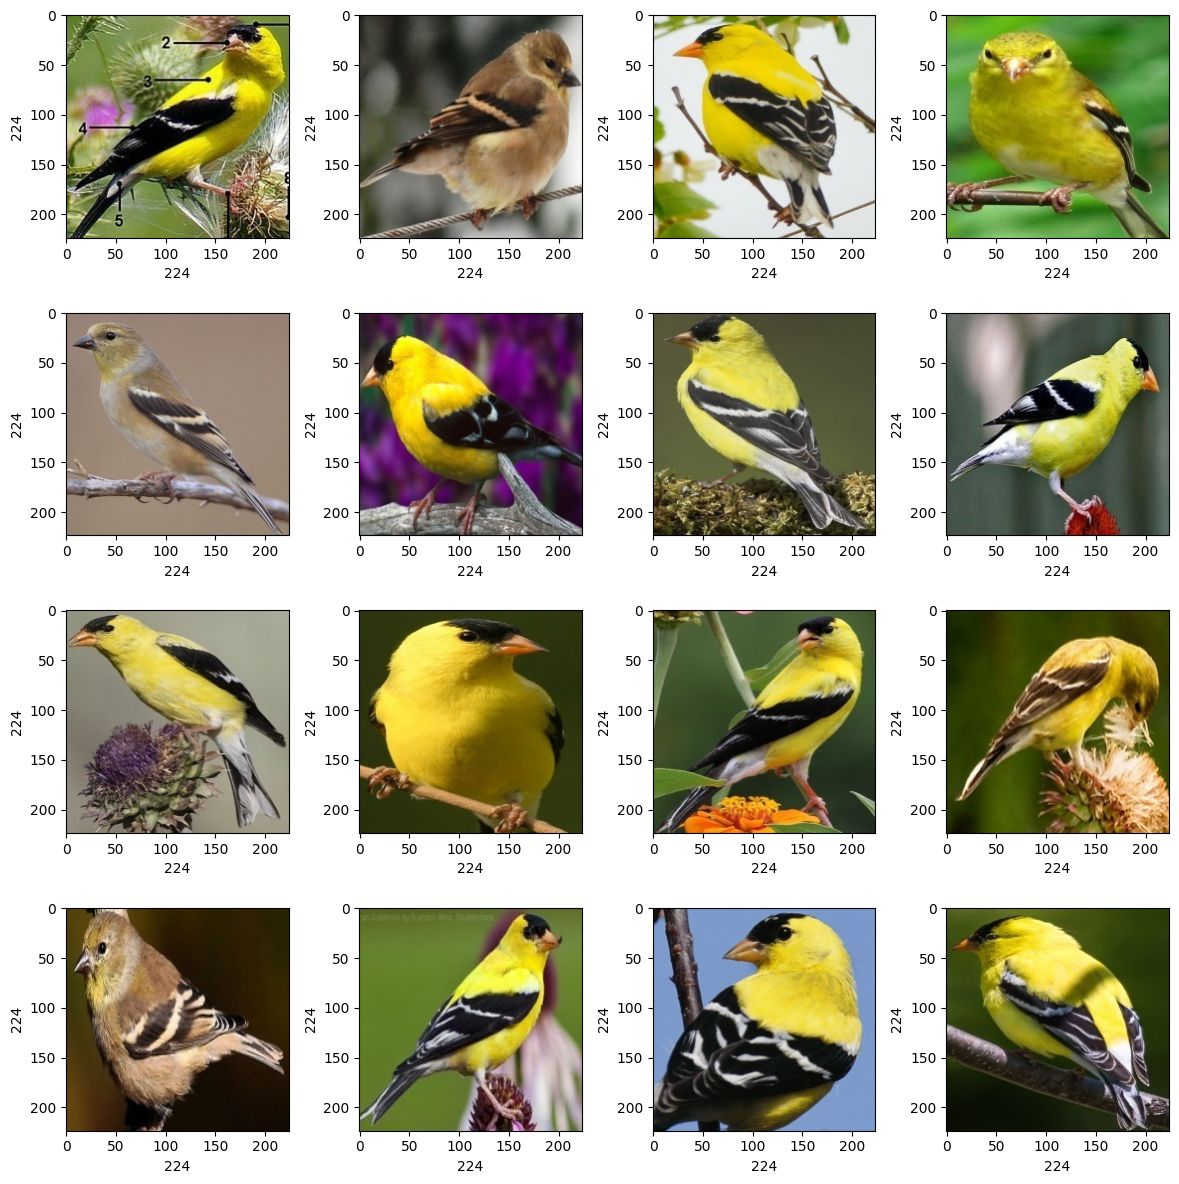

In [ ]:
plt.figure(figsize=(12, 12))
path = "/content/drive/MyDrive/AI WORK/datasets/bird species dataset/Data/Bird Speciees Dataset/AMERICAN GOLDFINCH"
image_files = os.listdir(path)
image_files = [file for file in image_files if file.endswith('.jpg') or file.endswith('.png')]
selected_images = random.sample(image_files, 16)

for i, image_file in enumerate(selected_images):
    plt.subplot(4, 4, i+1)
    plt.tight_layout()
    image_path = os.path.join(path, image_file)
    rand_img = plt.imread(image_path)
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1])
    plt.ylabel(rand_img.shape[0])

plt.show()


In [ ]:
dir="/content/drive/MyDrive/AI WORK/datasets/bird species dataset/Data/Bird Speciees Dataset"
root_dir=listdir(dir)
image_list,label_list=[],[]

In [ ]:
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path=f"{dir}/{directory}/{files}"
    image=cv2.imread(image_path)
    image=img_to_array(image)
    image_list.append(image)
    label_list.append(directory)


In [ ]:
label_count=pd.DataFrame(label_list).value_counts()
label_count


AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
dtype: int64

In [ ]:
num_class=len(label_count)
num_class

6

In [ ]:
image_list[0].shape

(224, 224, 3)

In [ ]:
label_list=np.array(label_list)
label_list.shape

(811,)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(image_list,label_list,test_size=0.2,random_state=10)

In [ ]:
x_train=np.array(x_train,dtype=np.float16)/225.0
x_test=np.array(x_test,dtype=np.float16)/255.0
x_train.reshape(-1,224,224,3)
x_test.reshape(-1,224,224,3)

array([[[[0.1098  , 0.5137  , 0.3647  ],
         [0.1098  , 0.5137  , 0.3647  ],
         [0.1059  , 0.51    , 0.3608  ],
         ...,
         [0.196   , 0.545   , 0.4158  ],
         [0.1921  , 0.5527  , 0.4158  ],
         [0.1882  , 0.5566  , 0.4197  ]],

        [[0.1137  , 0.5176  , 0.3687  ],
         [0.1098  , 0.5137  , 0.3647  ],
         [0.1098  , 0.5137  , 0.3647  ],
         ...,
         [0.1843  , 0.5254  , 0.396   ],
         [0.1843  , 0.537   , 0.4     ],
         [0.1804  , 0.541   , 0.4038  ]],

        [[0.102   , 0.5176  , 0.3647  ],
         [0.102   , 0.5176  , 0.3647  ],
         [0.1098  , 0.5137  , 0.3647  ],
         ...,
         [0.1882  , 0.502   , 0.3804  ],
         [0.1882  , 0.5137  , 0.3882  ],
         [0.1843  , 0.5176  , 0.392   ]],

        ...,

        [[0.153   , 0.5767  , 0.4119  ],
         [0.149   , 0.5728  , 0.408   ],
         [0.1451  , 0.569   , 0.4038  ],
         ...,
         [0.7256  , 0.933   , 0.9727  ],
         [0.7217  , 0.

In [ ]:
lb=LabelBinarizer()
y_train=lb.fit_transform(y_train)
y_test=lb.fit_transform(y_test)
print(lb.classes_)

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']


In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2)

In [ ]:
model=Sequential()
model.add(Conv2D(8,(3,3),padding='same',input_shape=(224,224,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(16,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(num_class,activation='softmax'))
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 8)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 74, 74, 16)        1168      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 18, 18, 32)      

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(0.0005),metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_val,y_val))

Epoch 1/50
5/5 [==============================] - 16s 3s/step - loss: 1.7599 - accuracy: 0.2471 - val_loss: 1.6814 - val_accuracy: 0.2923
Epoch 2/50
5/5 [==============================] - 17s 3s/step - loss: 1.6475 - accuracy: 0.3629 - val_loss: 1.5680 - val_accuracy: 0.3923
Epoch 3/50
5/5 [==============================] - 14s 3s/step - loss: 1.5491 - accuracy: 0.4247 - val_loss: 1.4886 - val_accuracy: 0.4077
Epoch 4/50
5/5 [==============================] - 14s 3s/step - loss: 1.4537 - accuracy: 0.4459 - val_loss: 1.3991 - val_accuracy: 0.4308
Epoch 5/50
5/5 [==============================] - 16s 3s/step - loss: 1.3061 - accuracy: 0.4865 - val_loss: 1.1818 - val_accuracy: 0.6462
Epoch 6/50
5/5 [==============================] - 14s 3s/step - loss: 1.1082 - accuracy: 0.6757 - val_loss: 1.0753 - val_accuracy: 0.6923
Epoch 7/50
5/5 [==============================] - 15s 3s/step - loss: 0.9607 - accuracy: 0.7066 - val_loss: 0.8907 - val_accuracy: 0.7538
Epoch 8/50
5/5 [==================

In [ ]:
model.save("/content/drive/MyDrive/AI WORK/datasets/bird species dataset")

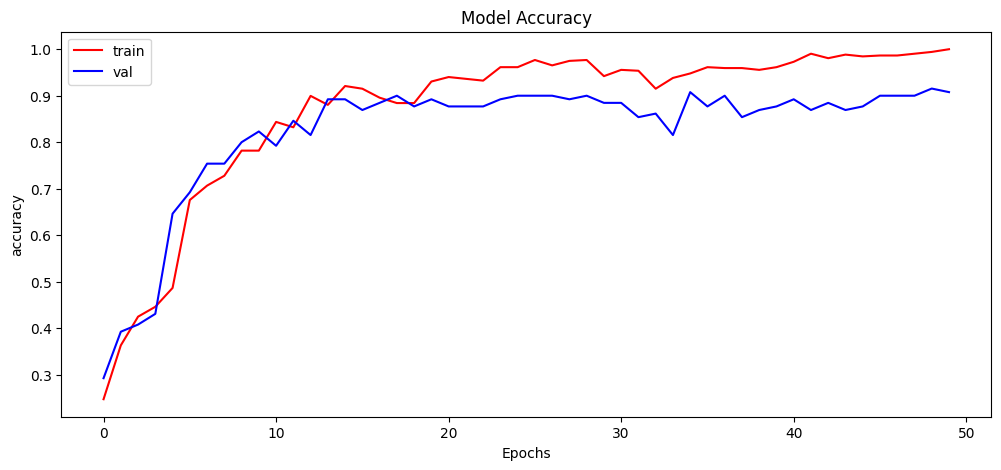

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'],color='b')
plt.title('Model Accuracy')
plt.ylabel("accuracy")
plt.xlabel('Epochs')
plt.legend(['train','val'])
plt.show()

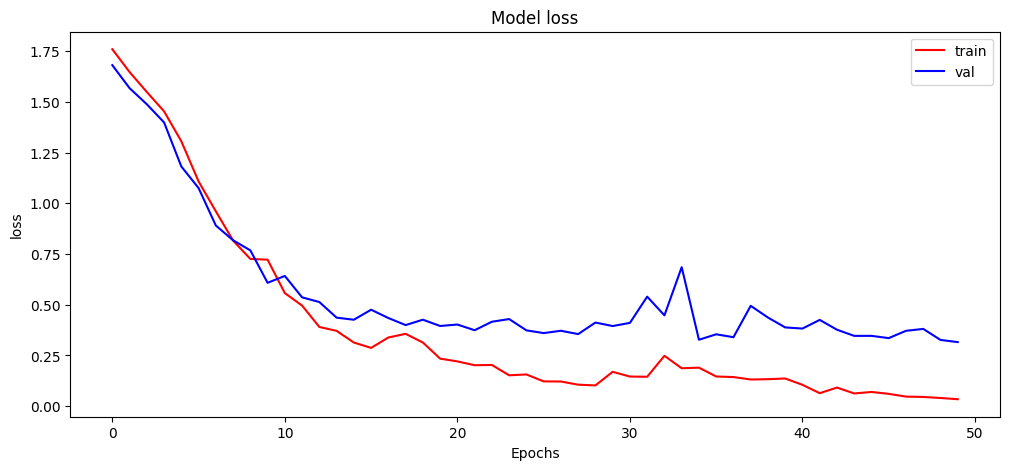

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='b')
plt.title('Model loss')
plt.ylabel("loss")
plt.xlabel('Epochs')
plt.legend(['train','val'])
plt.show()

In [ ]:
scores=model.evaluate(x_test,y_test)
print(f"Test Accuracy : {scores[1]*100}")

6/6 [==============================] - 1s 227ms/step - loss: 0.3374 - accuracy: 0.8957
Test Accuracy : 89.570552110672


In [ ]:
y_pred=model.predict(x_test)

6/6 [==============================] - 2s 229ms/step


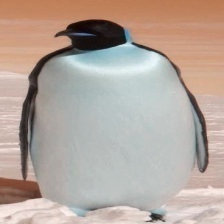

In [ ]:
img=array_to_img(x_test[18])
img

In [ ]:
labels=lb.classes_
print(labels)
print("originally : ", labels[np.argmax(y_test[18])])
print("predicted : ", labels[np.argmax(y_pred[18])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
originally :  EMPEROR PENGUIN
predicted :  EMPEROR PENGUIN
